In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../src')

In [3]:
! pip install -i https://test.pypi.org/simple/ my-krml_14229898==0.2.7

Looking in indexes: https://test.pypi.org/simple/

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


# Applying CRIPS-DM Methodology to a Business Problem

## Dataset 2 - Predicting Customer Churn in the Telecomunication Provider

### 3. Modeling

#### 3.3 AdaBoost Model

**[3.1]** Import the pandas and numpy packages

In [4]:
import pandas as pd
import numpy as np

**[3.2]** Import the `load_sets` from my custom package

#### 1. Load the datset

In [5]:
from my_krml_14229898.data.sets import load_sets_smote, load_sets

**[3.3]** Load the SMOTE saved sets from `data/processed`

In [6]:
X_train_resampled, y_train_resampled = load_sets_smote(path='../data/processed/')

**[3.4]** Load the `validating` and `testing` sets from `data/processed`

In [7]:
X_train, y_train, X_val, y_val, X_test, y_test = load_sets('../data/processed/')

#### 3.3.1 Train AdaBoost Model `(With SMOTE df)`

**[3.5]** Import the AdaBoostClassifier package

In [8]:
from sklearn.ensemble import AdaBoostClassifier

**[3.6]** Instantiate a `AdaBoostClassifier` class

In [9]:
clf = AdaBoostClassifier(n_estimators=50, random_state=42)

**[3.7]** Import `fit_asses_classifier` function from the customer package

In [10]:
from my_krml_14229898.models.performance import fit_assess_classifier

**[3.8]** Set the performance metrics to be used for the model.

In [11]:
metrics = ['precision', 'recall', 'f1', 'roc_auc']

**[3.9]** Fit the model and display the performance on training and validation sets.

In [12]:
clf = fit_assess_classifier(clf, X_train_resampled, y_train_resampled, X_val, y_val, metrics=metrics)

                f1  precision    recall  roc_auc
Training  0.812127   0.789795  0.835758  0.80666
                  f1  precision    recall   roc_auc
Validation  0.646018   0.569201  0.746803  0.764642


**[4.0]** Import `plot_confusion_matrix`, `plot_roc_auc_curve`, and `permutation_importance` from the custom package

In [13]:
from my_krml_14229898.models.performance import plot_confusion_matrix, plot_roc_auc_curve, permutation_importance

**[4.1]** Plot the Confusion Matrix of Traning and Validation set

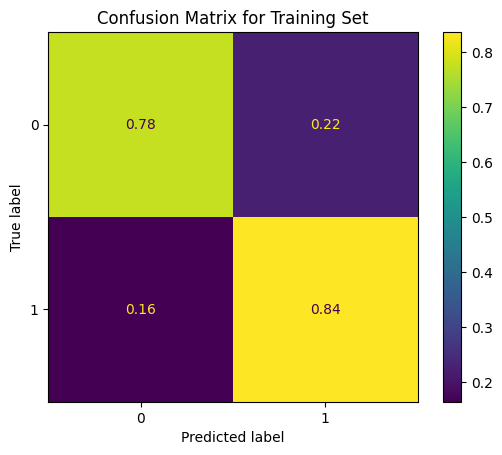

In [14]:
plot_confusion_matrix(clf, X_train_resampled, y_train_resampled, "Training")

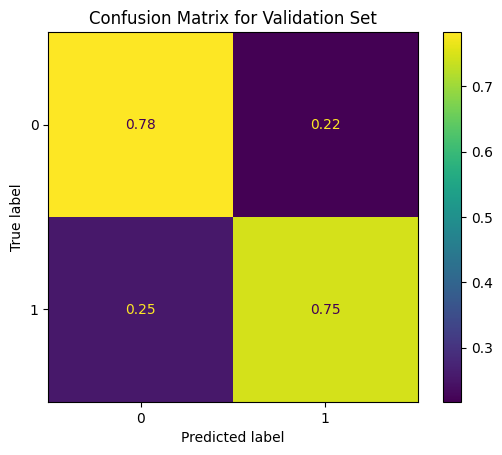

In [15]:
plot_confusion_matrix(clf, X_val, y_val, "Validation")

**[4.2]** Plot the ROC-AUC Curve of Training and Validation set

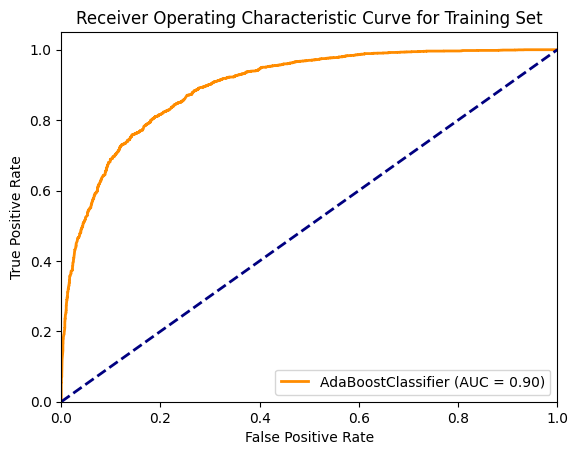

In [16]:
plot_roc_auc_curve(clf, X_train_resampled, y_train_resampled, "Training", 'AdaBoostClassifier')

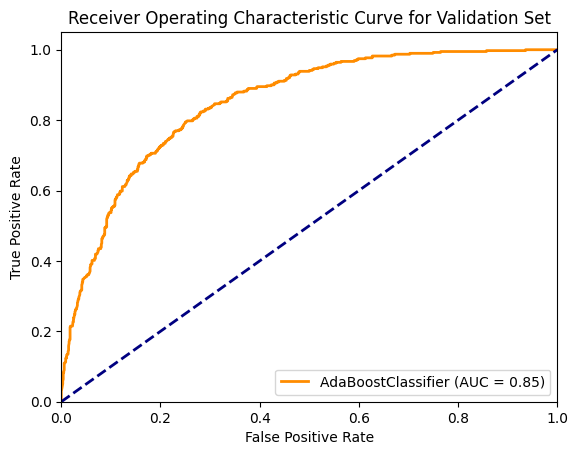

In [17]:
plot_roc_auc_curve(clf, X_val, y_val, "Validation", "AdaBoostClassifier")

**[4.3]** Display the Permutations Importance

In [18]:
df = pd.read_csv("../data/processed/df_cleaned.csv")
target = "Churn"

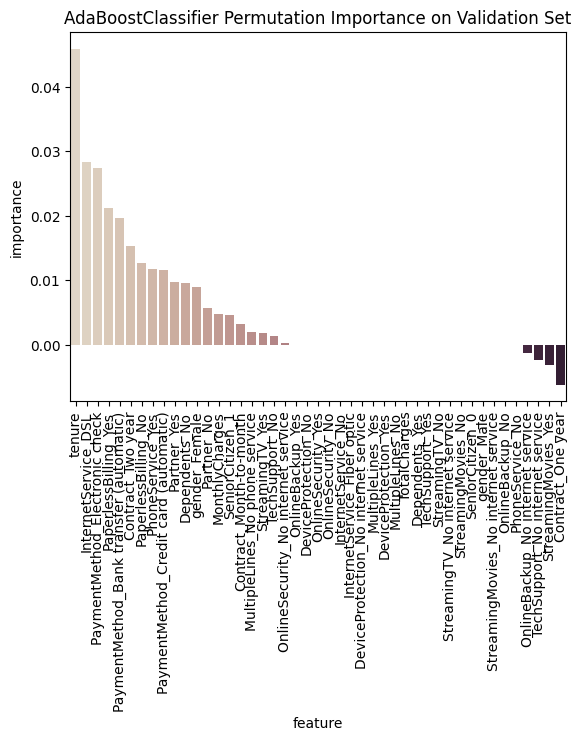

In [20]:
clf_permu = permutation_importance(df, target, clf, X_val, y_val, "Validation", "AdaBoostClassifier")

In [21]:
clf_permu

,feature,importance
0,tenure,0.045913
1,InternetService_DSL,0.028358
2,PaymentMethod_Electronic check,0.027411
3,PaperlessBilling_Yes,0.021180
4,PaymentMethod_Bank transfer (automatic),0.019664
5,Contract_Two year,0.015376
6,PaperlessBilling_No,0.012698
7,PhoneService_Yes,0.011774
8,PaymentMethod_Credit card (automatic),0.011656
9,Partner_Yes,0.009808


**[4.4]** Import `dump` from `joblib` and save the fitted model into the folder `models` as a file called `adaboost.joblib`

In [27]:
from joblib import dump

dump(clf, '../models/adaboost.joblib')

['../models/adaboost.joblib']

#### 3. Hyperparameter tuning with Hyperopt

**[4.5]** Import Trials, STATUS_OK, tpe, hp, fmin from hyperopt package

In [28]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
rstate = np.random.default_rng(42)

**[4.6]** Define the search space for XGBClassifier hyperparameters


In [29]:
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 1),
    'learning_rate': hp.loguniform('learning_rate', -7, 0)
}

C = 0.00001 - 100
penalty = l2 or None
max_iter = 100 - 5000
solver = 'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'
fit_intercept = True, False

**[4.7]** Define a function called `objective` with the following logics:
- input parameters: hyperparameter seacrh space (`space`)
- logics: train a logistic model with the search space and calculate the average `recall` score for cross validation with 5 folds
- output parameters: dictionary with the loss score and STATUS_OK

In [30]:
from sklearn.model_selection import cross_val_score

def objective(space):
    classifier = AdaBoostClassifier(
        n_estimators = int(space['n_estimators']),
        learning_rate = space['learning_rate']
    )
    
    acc = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    return {'loss': -acc, 'status': STATUS_OK}

**[4.8]** Launch Hyperopt search and save the result in a variable called `best`

In [31]:
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    rstate=rstate,
)

100%|██████████| 100/100 [06:51<00:00,  4.11s/trial, best loss: -0.7994344279345376]


**[4.9]** Print the best set of hyperparameters

In [32]:
print("Best parameters: ", best)

Best parameters:  {'learning_rate': 0.23034098923059715, 'n_estimators': 154.0}


In [33]:
best_params = {
    'n_estimators': int(best['n_estimators']),
    'learning_rate': best['learning_rate'],
}

**[5.0]** Instantiate a XGBClassifier with the best set of hyperparameters

In [34]:
clf_2 = AdaBoostClassifier(**best_params)

**[5.1]** Fit the model and display the performance on training and validation sets.


In [35]:
clf_2 = fit_assess_classifier(clf_2, X_train_resampled, y_train_resampled, X_val, y_val, metrics)

                f1  precision    recall   roc_auc
Training  0.799566   0.768565  0.833172  0.791141
                  f1  precision    recall   roc_auc
Validation  0.651992   0.552398  0.795396  0.773682


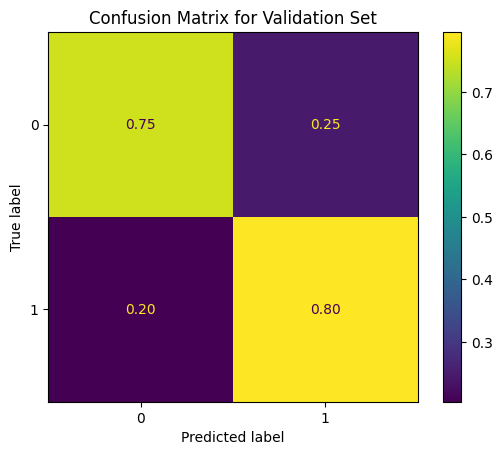

In [36]:
plot_confusion_matrix(clf_2, X_val, y_val, "Validation")

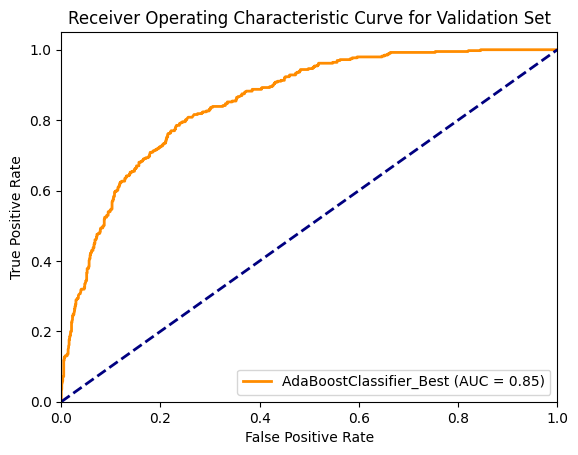

In [37]:
plot_roc_auc_curve(clf_2, X_val, y_val, "Validation", "AdaBoostClassifier_Best")

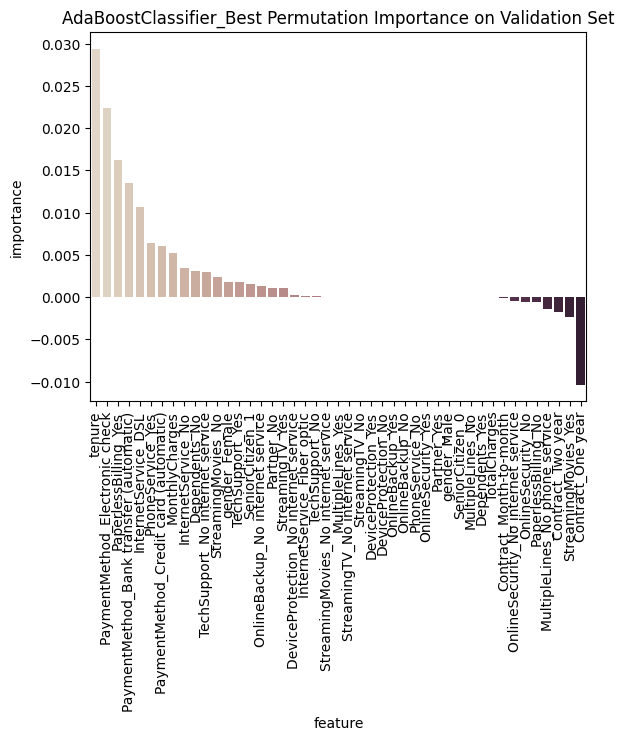

In [38]:
clf_permu_2 = permutation_importance(df, target, clf_2, X_val, y_val, "Validation", "AdaBoostClassifier_Best")